In [302]:
import numpy as np
import pandas as pd

# next command ensures that plots appear inside the notebook
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns  # also improves the look of plots
sns.set()  # set Seaborn defaults
plt.rcParams['figure.figsize'] = [15, 15]  # default hor./vert. size of plots, in inches
plt.rcParams['lines.markeredgewidth'] = 1  # to fix issue with seaborn box plots; needed after import seaborn

In [303]:
df_boolean = pd.read_csv("../dfs/2024-06-13_09-18-50.csv")
df_arith = pd.read_csv("../dfs/2024-06-12_18-43-05.csv")

df_boolean.head()

129793.488
263.282
574.9057834148407
260.0522301197052


,Unnamed: 0,ref_img,other_img,result,expected_result,cos_dist_np,cos_dist_sfe,total_time,sfe_time,extraction_time,server.Command being timed,server.User time (seconds),server.System time (seconds),server.Percent of CPU this job got,server.Elapsed (wall clock) time (h:mm:ss or m:ss),server.Average shared text size (kbytes),server.Average unshared data size (kbytes),server.Average stack size (kbytes),server.Average total size (kbytes),server.Maximum resident set size (kbytes),server.Average resident set size (kbytes),server.Major (requiring I/O) page faults,server.Minor (reclaiming a frame) page faults,server.Voluntary context switches,server.Involuntary context switches,server.Swaps,server.File system inputs,server.File system outputs,server.Socket messages sent,server.Socket messages received,server.Signals delivered,server.Page size (bytes),server.Exit status,client.Command being timed,client.User time (seconds),client.System time (seconds),client.Percent of CPU this job got,client.Elapsed (wall clock) time (h:mm:ss or m:ss),client.Average shared text size (kbytes),client.Average unshared data size (kbytes),client.Average stack size (kbytes),client.Average total size (kbytes),client.Maximum resident set size (kbytes),client.Average resident set size (kbytes),client.Major (requiring I/O) page faults,client.Minor (reclaiming a frame) page faults,client.Voluntary context switches,client.Involuntary context switches,client.Swaps,client.File system inputs,client.File system outputs,client.Socket messages sent,client.Socket messages received,client.Signals delivered,client.Page size (bytes),client.Exit status,energy_client,energy_server,server.hardware.aes.performance,server.hardware.rtt,server.hardware.throughput,server.online_time.bool.local_gates,server.online_time.bool.interactive_gates,server.online_time.bool.layer_finish,server.online_time.yao.local_gates,server.online_time.yao.interactive_gates,server.online_time.yao.layer_finish,server.online_time.yao_rev.local_gates,server.online_time.yao_rev.interactive_gates,server.online_time.yao_rev.layer_finish,server.online_time.arith.local_gates,server.online_time.arith.interactive_gates,server.online_time.arith.layer_finish,server.online_time.splut.local_gates,server.online_time.splut.interactive_gates,server.online_time.splut.layer_finish,server.online_time.communication,server.complexities.boolean_sharing.ands,server.complexities.boolean_sharing.depth,server.complexities.total_vec_and,server.complexities.total_non_vec_and,server.complexities.xor_vals,server.complexities.gates,server.complexities.comb_gates,server.complexities.combstruct_gates,server.complexities.perm_gates,server.complexities.subset_gates,server.complexities.split_gates,server.complexities.yao.ands,server.complexities.yao.depth,server.complexities.reverse_yao.ands,server.complexities.reverse_yao.depth,server.complexities.arithmetic_sharing.muls,server.complexities.arithmetic_sharing.depth,server.complexities.sp_lut_sharing.ot_gates_total,server.complexities.sp_lut_sharing.depth,server.complexities.total_nr_of_gates,server.complexities.total_depth,server.timings.total,server.timings.init,server.timings.circuitgen,server.timings.network,server.timings.baseots,server.timings.setup,server.timings.otextension,server.timings.garbling,server.timings.online,server.communication.total.sent,server.communication.total.received,server.communication.base_ots.sent,server.communication.base_ots.received,server.communication.setup.sent,server.communication.setup.received,server.communication.otextension.sent,server.communication.otextension.received,server.communication.garbling.sent,server.communication.garbling.received,server.communication.online.sent,server.communication.online.received,server.cos_dist_ver,server.cos_dist_sfe,client.hardware.aes.performance,client.hardware.rtt,client.hardware.throughput,client.online_time.bool.local_gates,client.online_time.bool.interactive_gates,client.online_time.bool.layer_finish,client.o

In [304]:
# for i in range(len(df_boolean["cos_dist_np"])):
#     print(df_boolean["cos_dist_np"][i])
#     print(df_boolean["cos_dist_sfe"][i])
#     print()

# remove any value in df_boolean["cos_dist_sfe"][i] that is larger than 2 or smaller than -2
# for i in range(len(df_boolean["cos_dist_sfe"])):
#     if df_boolean["cos_dist_sfe"][i] > 2 or df_boolean["cos_dist_sfe"][i] < -2:
#         df_boolean["cos_dist_sfe"][i] = df_boolean["cos_dist_np"][i]



# # devide all values from df_arith["cos_dist_sfe"][i] by 10000000
# for i in range(len(df_arith["cos_dist_sfe"])):
#     df_arith["cos_dist_np"][i] = 1 - (df_arith["cos_dist_np"][i] / 10000000)
#     df_arith["cos_dist_sfe"][i] = 1 - (df_arith["cos_dist_sfe"][i] / 10000000)

In [305]:
# I want to plot the cosine distance of df_32_new (cos_dist_np) against the cos_dist_sfe of that same frame (df_32_new)
# I want to see if the new cosine distance is better than the old one
# I will use a scatter plot for this
# now make a line plot
# plt.plot(df_arith["cos_dist_np"], label="cos_dist_np-new")
# plt.plot(df_arith["cos_dist_sfe"], label="cos_dist_sfe-new")
# plt.plot(df_boolean["cos_dist_np"], label="cos_dist_np-old")
# plt.plot(df_boolean["cos_dist_sfe"], label="cos_dist_sfe-old")
# plt.xlabel("Frame")
# plt.ylabel("Cosine Distance")
# plt.legend()
# plt.title("cos_dist_np vs cos_dist_sfe")
# plt.show()

In [306]:
l = [df_boolean['sfe_time'], df_arith['sfe_time']]

Text(0.5, 0, 'Configuration')

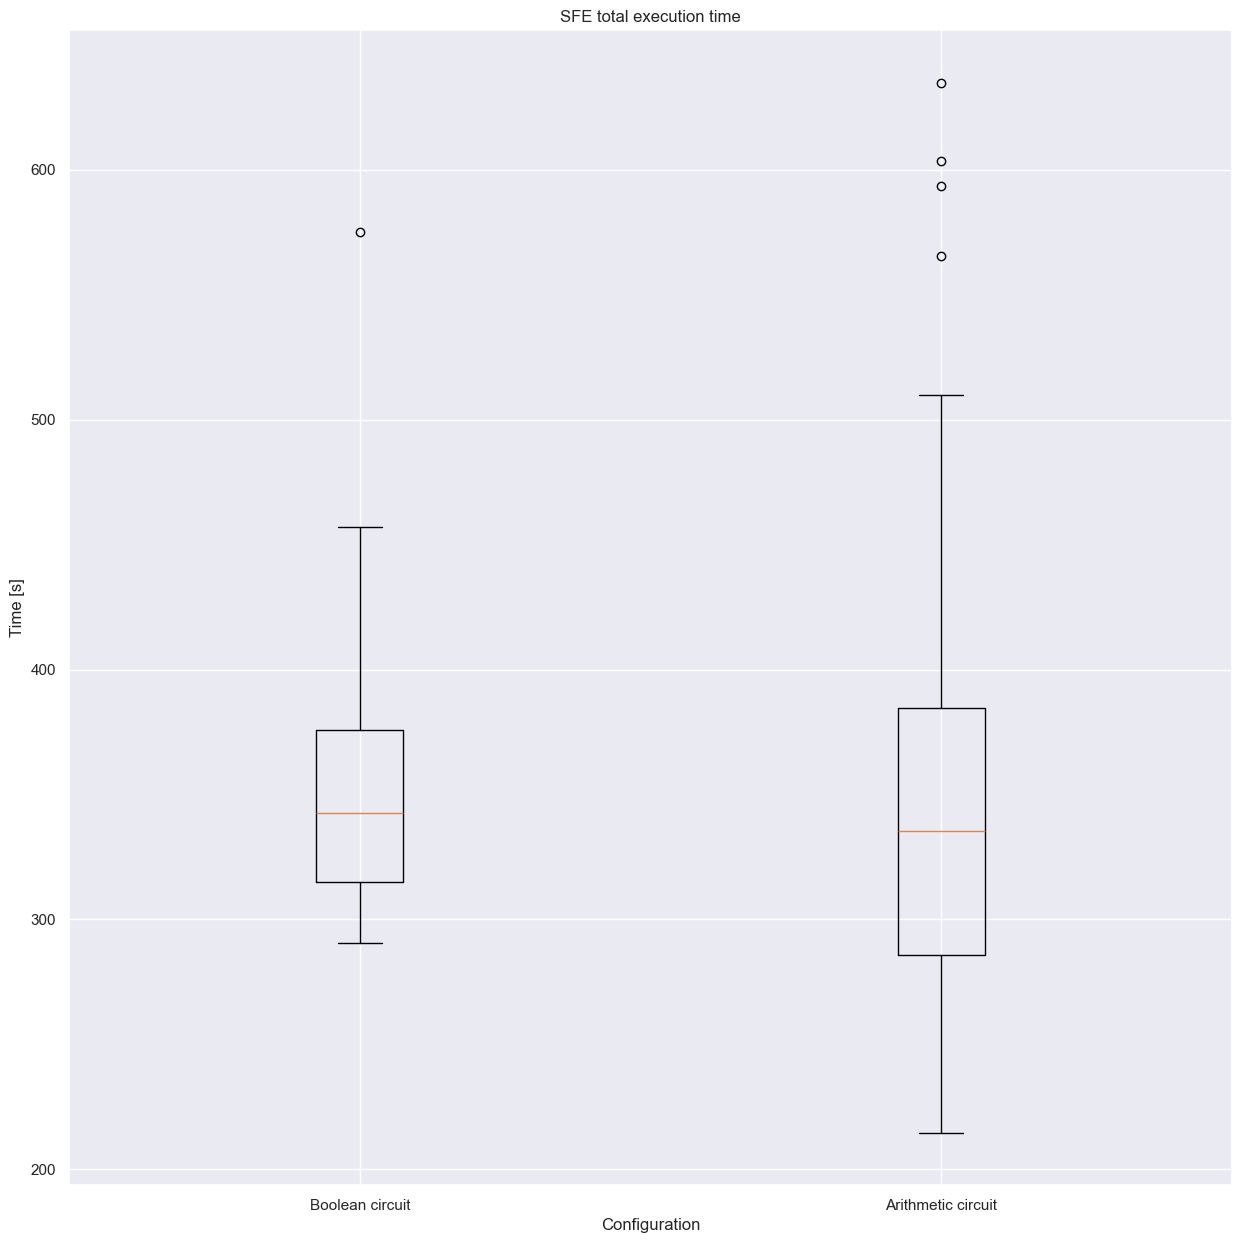

In [307]:
# plt.xticks(rotation=0)
labels = ["Boolean circuit", "Arithmetic circuit"]
ax = plt.boxplot(l, labels=labels)
plt.title("SFE total execution time")
plt.ylabel("Time [s]")
plt.xlabel("Configuration")

df_arith_timing = df_arith['sfe_'] / 1000
df_arith_timing.plot()
plt.title("SFE total time: 32-bit")
plt.ylabel("Time [s]")
plt.xlabel("Iteration #")

<Axes: >

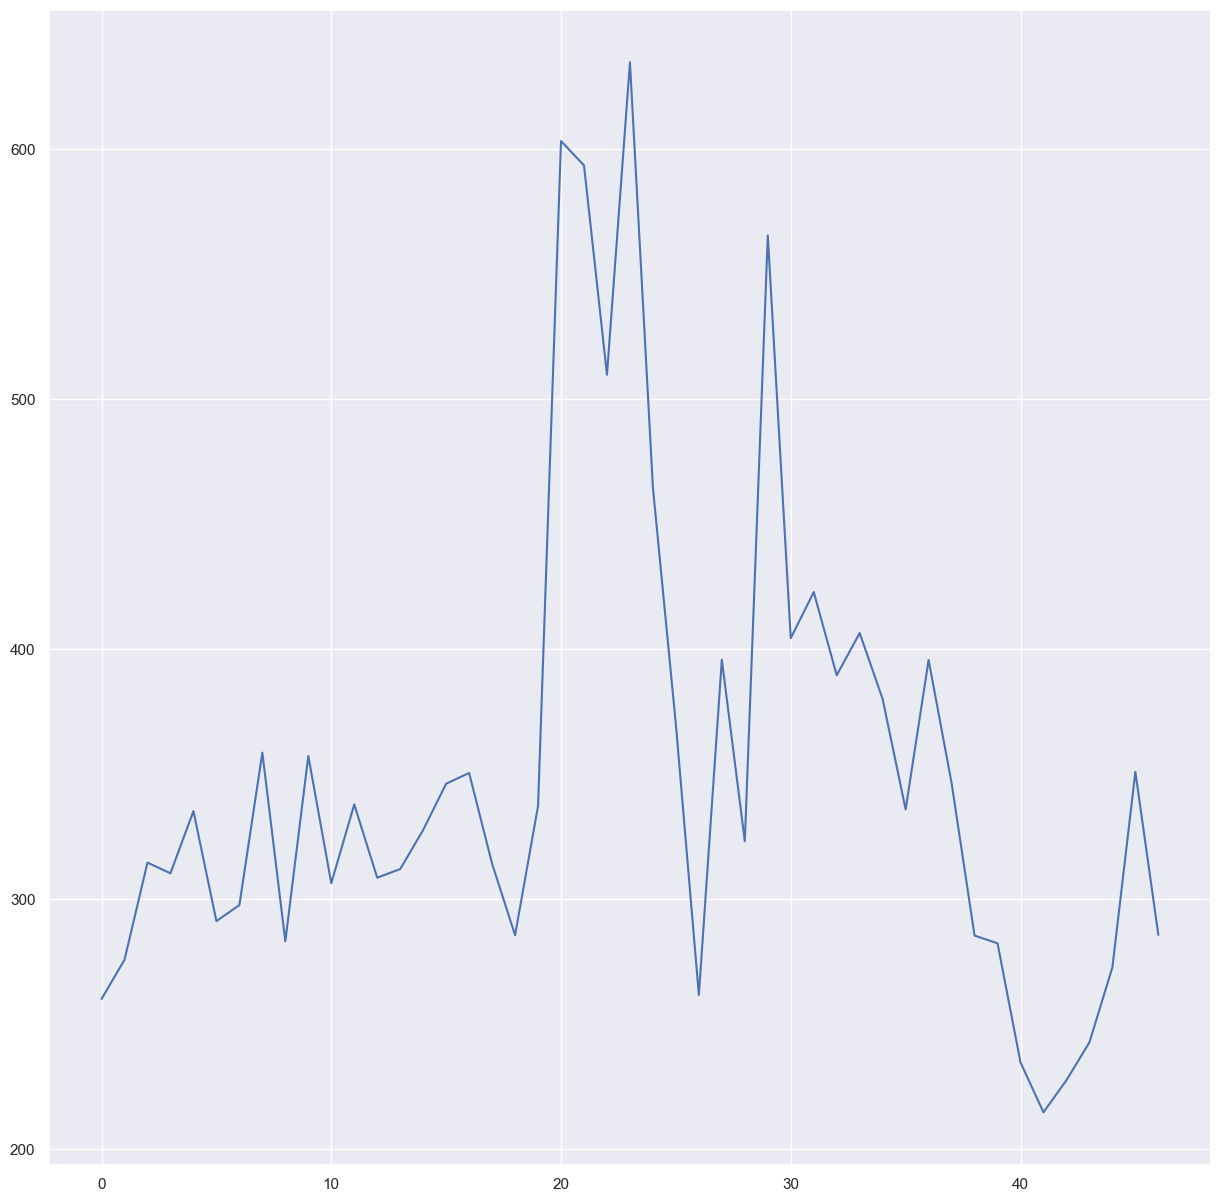

In [308]:
df_arith_timings_1st = df_arith['sfe_time']
df_arith_timings_1st.plot()